# Export Graphs for Report
Run this section to save all graphs as images for PDF report

# EDA FOR HOTEL BOOKING
## **PRESENTED BY SYED MUHAMMAD ALI**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_booking.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


# Exploratory Data Analysis and Data Cleaning

In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
# Convert datetime with correct format (day/month/year)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], dayfirst=True)

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [11]:
for col in df.describe(include='object').columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("\n")

Column: hotel
['Resort Hotel' 'City Hotel']


Column: arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


Column: meal
['BB' 'FB' 'HB' 'SC' 'Undefined']


Column: country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' '

In [12]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
df.drop(['company', 'agent'], axis=1, inplace=True)

In [14]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [15]:
# Handle children and country missing values
df['children'].fillna(df['children'].median(), inplace=True)
df['country'].fillna('Unknown', inplace=True)

C:\Users\Prince\AppData\Local\Temp\ipykernel_2764\1505749199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(df['children'].median(), inplace=True)
C:\Users\Prince\AppData\Local\Temp\ipykernel_2764\1505749199.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798,NaN


In [17]:
# Handle outliers
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['adr'] >= lower_bound) & (df['adr'] <= upper_bound)]
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597
mean,0.369863,105.019594,2016.144753,27.045788,15.770089,0.920768,2.481466,1.846034,0.082675,0.007492,0.032518,0.089803,0.140825,0.217004,2.387640,97.036643,0.059673,0.561675,2016-07-24 13:40:20.128550144
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000,0.000000,2016-01-28 00:00:00
50%,0.000000,70.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000,0.000000,0.000000,2016-07-30 00:00:00
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.370000,0.000000,1.000000,2017-02-02 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,211.030000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482769,107.698911,0.706990,13.751521,8.783471,0.997659,1.905873,0.579323,0.349955,0.095103,0.177372,0.857844,1.521074,0.647200,17.863821,40.614556,0.240109,0.785333,NaN


# Data analysis and Visulaization

is_canceled
0    0.630137
1    0.369863
Name: proportion, dtype: float64


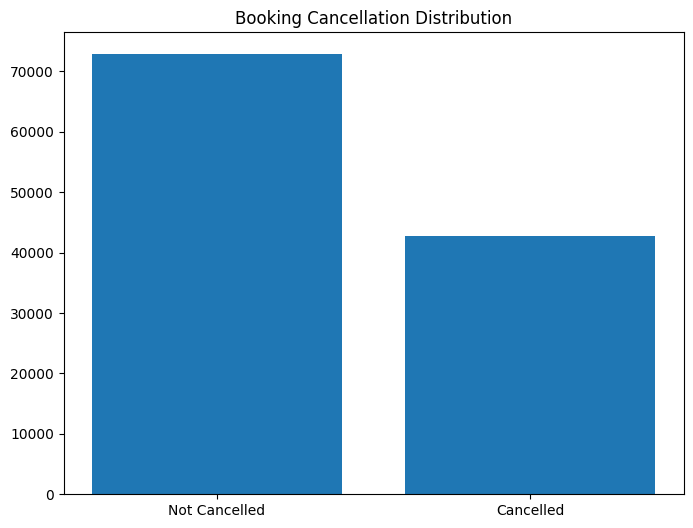

In [18]:
cancelled_percentage = df['is_canceled'].value_counts(normalize=True)
print(cancelled_percentage)

plt.figure(figsize=(8,6))

plt.bar(['Not Cancelled', 'Cancelled'], df['is_canceled'].value_counts())
plt.title('Booking Cancellation Distribution')
plt.show()

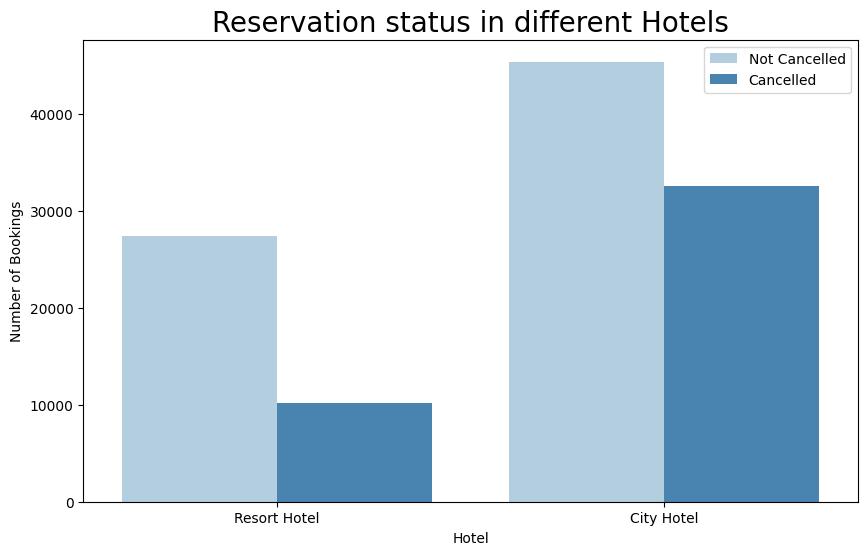

In [19]:
plt.figure(figsize=(10,6))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette='Blues')
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Not Cancelled', 'Cancelled'])
plt.title('Reservation status in different Hotels', size = 20)
plt.xlabel('Hotel')
plt.ylabel('Number of Bookings')
plt.show()

In [20]:
resort_hotel = df[df['hotel']== 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)


is_canceled
0    0.729877
1    0.270123
Name: proportion, dtype: float64

In [21]:
city_hotel = df[df['hotel']== 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582137
1    0.417863
Name: proportion, dtype: float64

In [22]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

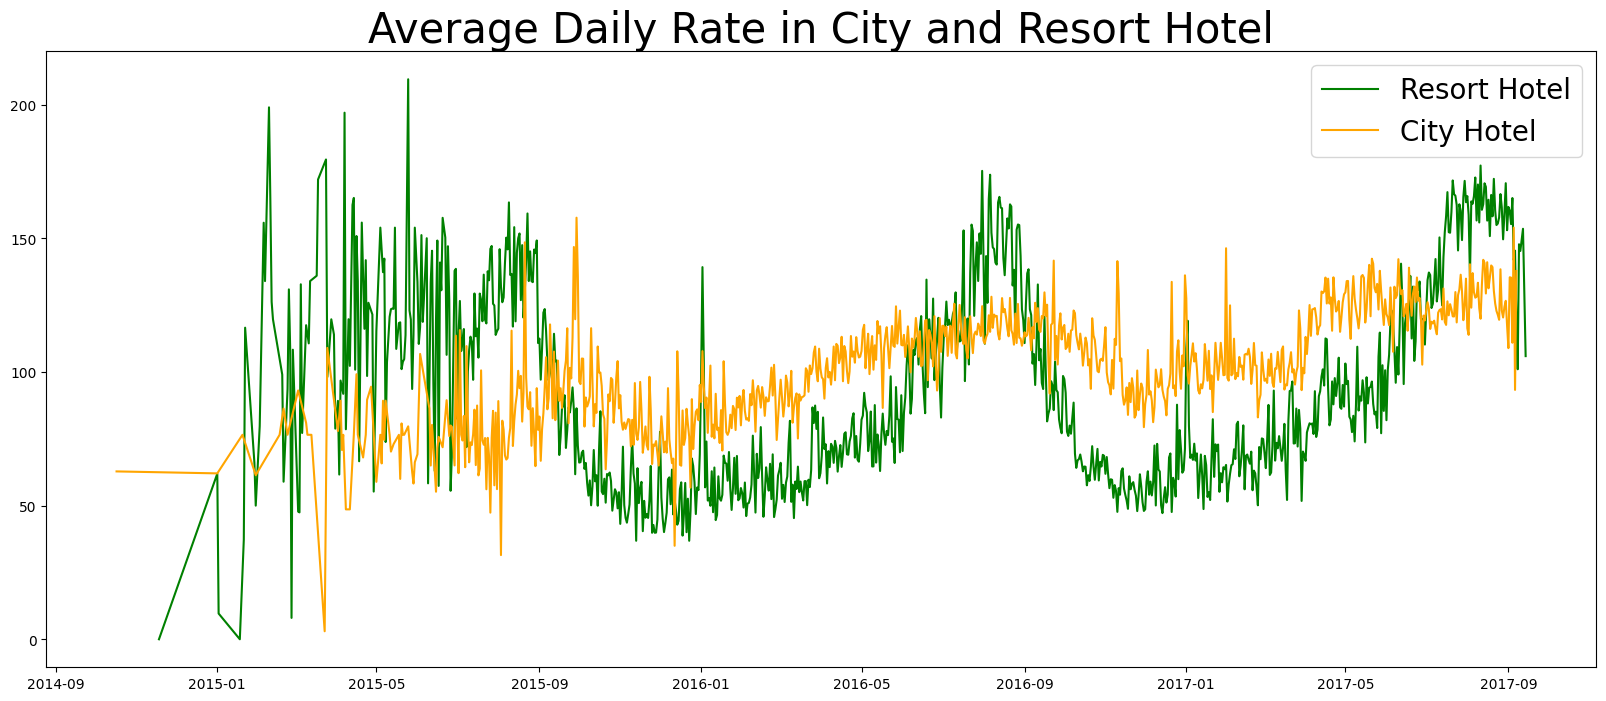

In [23]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel', color='green')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel', color='orange')
plt.legend(fontsize=20)
plt.show()

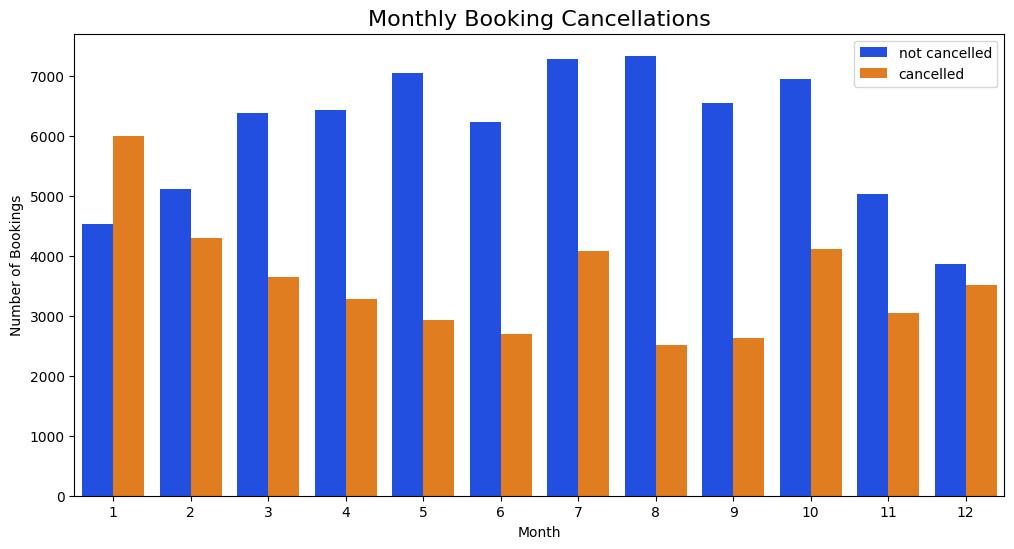

In [24]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(12,6))
ax1 = sns.countplot(x = 'month', hue='is_canceled', data=df, palette='bright')
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Monthly Booking Cancellations', size=16)
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(['not cancelled', 'cancelled'])
plt.show()


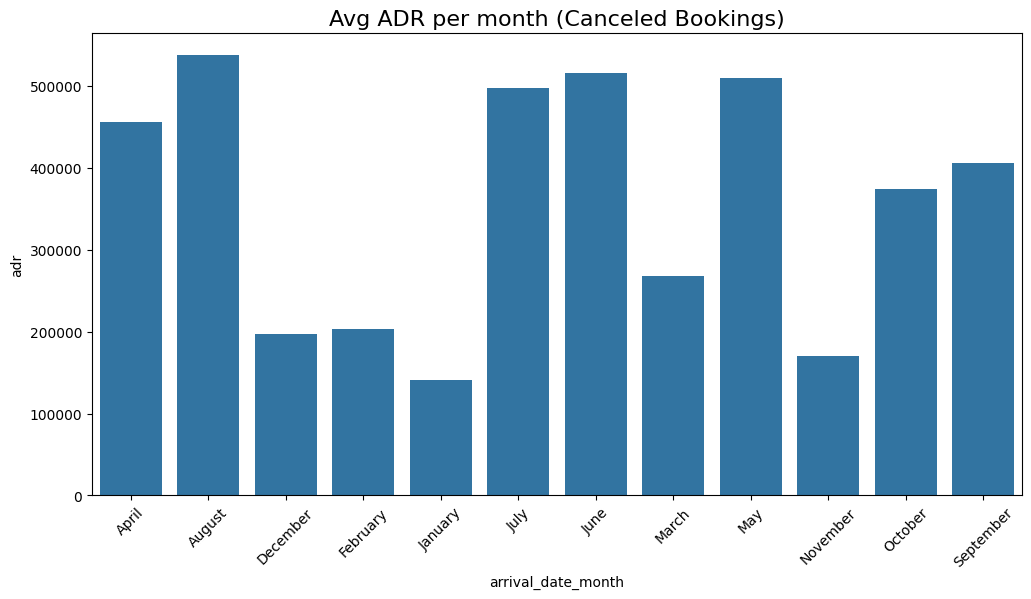

In [25]:
plt.figure(figsize=(12,6))
plt.title('Avg ADR per month (Canceled Bookings)', fontsize=16)
sns.barplot(x='arrival_date_month', y='adr', data=df[df['is_canceled']==1].groupby('arrival_date_month')[['adr']].sum().reset_index())
plt.xticks(rotation=45)
plt.show()

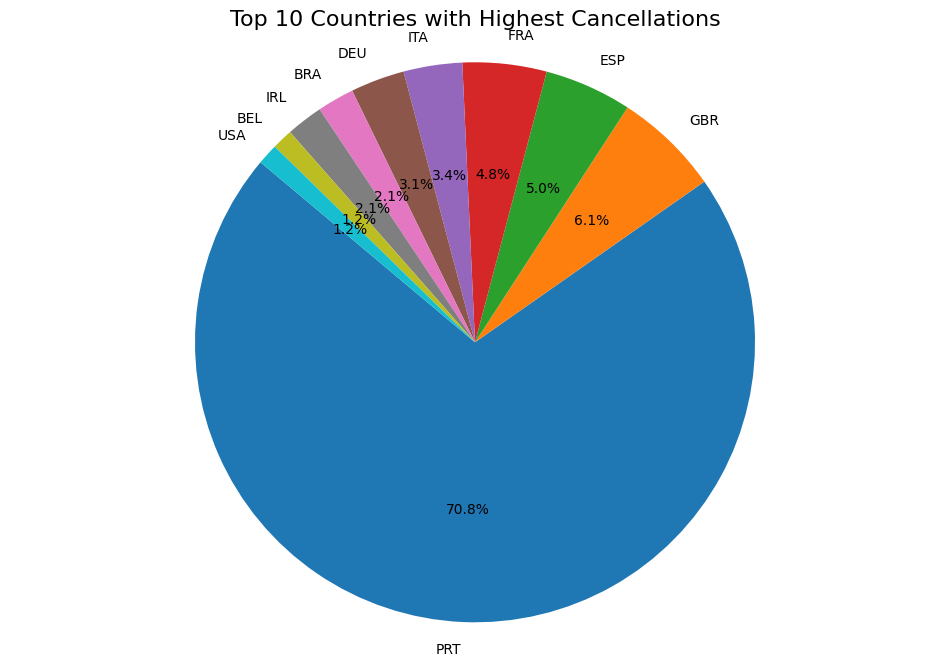

In [26]:
# which top 10 countries have the highest number of cancellations
top_countries = df[df['is_canceled']==1]['country'].value_counts().head(10)
plt.figure(figsize=(12,8))
plt.pie(top_countries.values, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries with Highest Cancellations', size=16)
plt.axis('equal')
plt.show()

In [27]:
# Market segmentation
df['market_segment'].value_counts()

market_segment
Online TA        53786
Offline TA/TO    24111
Groups           19712
Direct           11717
Corporate         5289
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [28]:
df['market_segment'].value_counts(normalize=True)


market_segment
Online TA        0.465289
Offline TA/TO    0.208578
Groups           0.170523
Direct           0.101361
Corporate        0.045754
Complementary    0.006428
Aviation         0.002050
Undefined        0.000017
Name: proportion, dtype: float64

In [29]:
# Market segment for cancelled bookings
cancelled_data = df[df['is_canceled'] == 1]
cancelled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.456321
Groups           0.282049
Offline TA/TO    0.193919
Direct           0.041024
Corporate        0.023155
Complementary    0.002269
Aviation         0.001216
Undefined        0.000047
Name: proportion, dtype: float64

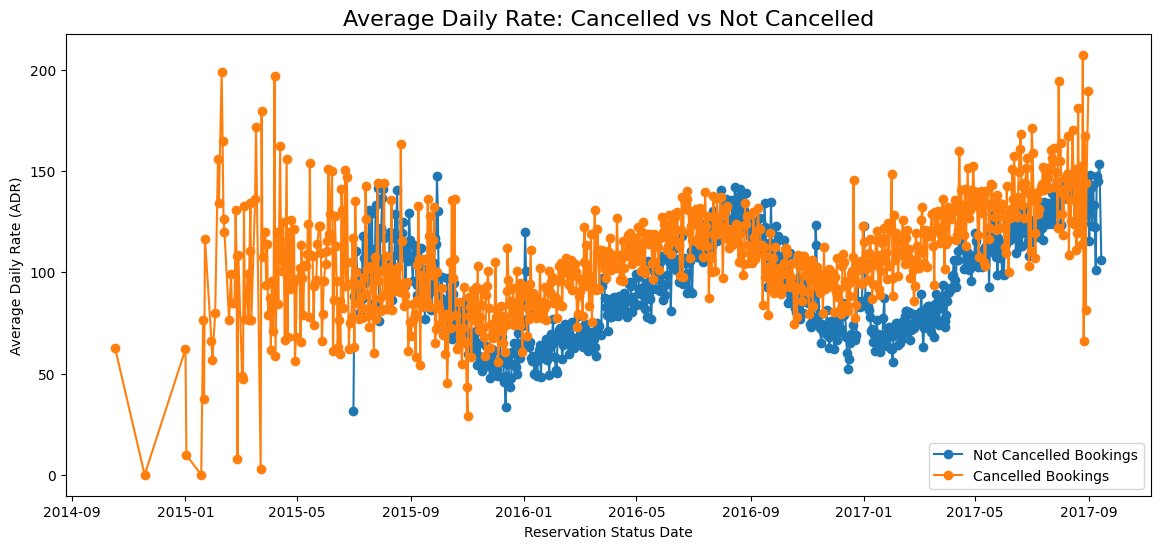

In [30]:
# Compare ADR between cancelled and not cancelled bookings
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean().reset_index()
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean().reset_index()
not_cancelled_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(14,6))
plt.title('Average Daily Rate: Cancelled vs Not Cancelled', fontsize=16)
plt.plot(not_cancelled_adr['reservation_status_date'], not_cancelled_adr['adr'], label='Not Cancelled Bookings', marker='o')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='Cancelled Bookings', marker='o')
plt.xlabel('Reservation Status Date')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Average Daily Rate (2016-2017): Cancelled vs Not Cancelled')

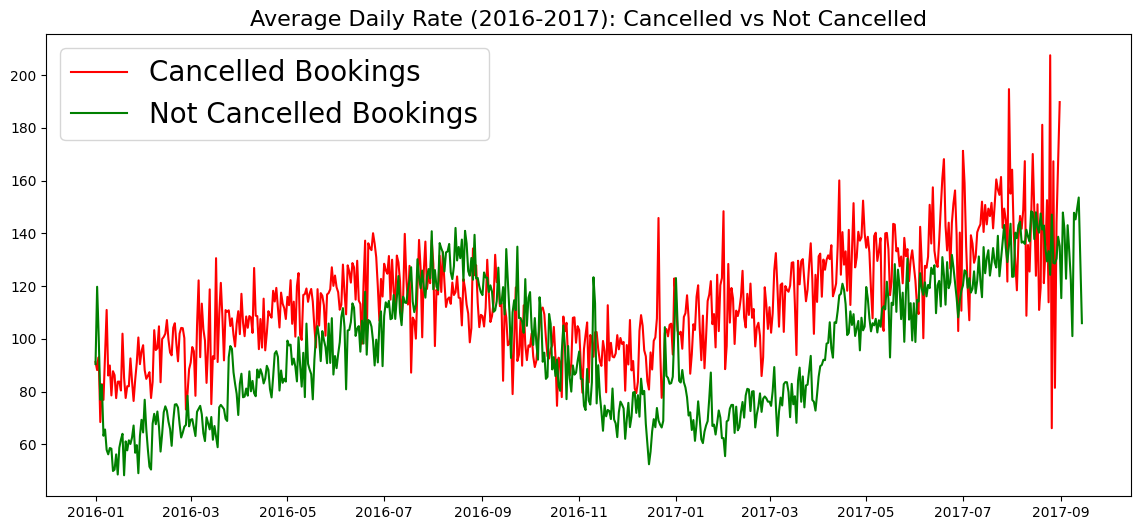

In [31]:
# only 2016 to 2017 data
cancelled_data_adr = cancelled_data[(cancelled_data['reservation_status_date'].dt.year >= 2016) & (cancelled_data['reservation_status_date'].dt.year <= 2017)]
not_cancelled_data_adr = not_cancelled_data[(not_cancelled_data['reservation_status_date'].dt.year >= 2016) & (not_cancelled_data['reservation_status_date'].dt.year <= 2017)]
plt.figure(figsize=(14,6))
plt.plot(cancelled_data_adr.groupby('reservation_status_date')[['adr']].mean(), label='Cancelled Bookings', color='red')
plt.plot(not_cancelled_data_adr.groupby('reservation_status_date')[['adr']].mean(), label='Not Cancelled Bookings', color='green')
plt.legend(fontsize = 20)
plt.title('Average Daily Rate (2016-2017): Cancelled vs Not Cancelled', fontsize=16)

## 🚀 Launch Streamlit Dashboard

In [ ]:
# Run this cell to open the Streamlit dashboard in your browser
# Note: This will start a local server. Press Ctrl+C in the terminal to stop it.

!streamlit run "../Application/app.py"